In [10]:
import numpy as np
import scipy as sp
import cvxpy as cp

from models import Model, ExampleModel
from methods import algorithm_1, TrackingADMM, DPMM

from typing import List

from tqdm import tqdm
from matplotlib import pyplot as plt

myparams = {
    'text.usetex': True,
    'text.latex.preamble': r'\usepackage{amsfonts}',
    'font.family': 'Djvu Serif',
    'font.size': 16,
    'axes.grid': True,
    'grid.alpha': 0.1,
    'lines.linewidth': 2
}

plt.rcParams.update(myparams)

%config InlineBackend.figure_format = "retina"
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Numerical Experiment

There we will use a model from Example 2 in paper ["Decentralized Proximal Method of Multipliers for Convex Optimization with Coupled Constraints", 2023](https://arxiv.org/pdf/2310.15596.pdf), but with L2 borm instead of L1, universal regularization parameter for all nodes, without right part of equality constraints and without inequality constraints.

This problem is also similar to Example in paper ["Decentralized Strongly-Convex Optimization with Affine Constraints: Primal and Dual Approaches"](https://arxiv.org/pdf/2207.04555.pdf), but there are distinct variables on each node.

$$ \min_{\mathbf{x}} F(\mathbf{x}) = \sum\limits_{i=1}^{n} \Big( \frac{1}{2}\| C_i x_i - d_i \|_2^{2} + \frac{\theta}{2} \| x_i \|_2^2 \Big) $$
$$ \textrm{s.t.} \quad \sum\limits_{i=1}^{n} \left( A_i x_i - b_i \right) = 0 $$ 
We can calculate function, gradient and hessian using
$$ \mathbf{C} = \mathrm{diag}\left(C_1, \ldots, C_n \right), \quad \mathbf{d} = \mathrm{col}\left( d_1, \ldots, d_n \right) $$
as
$$ F(\mathbf{x}) = \frac{1}{2}\| \mathbf{C} \mathbf{x} - \mathbf{d} \|_2^{2} + \frac{\theta}{2} \| \mathbf{x} \|_2^2 $$
$$ \nabla F(\mathbf{x}) = \mathbf{C}^\top \mathbf{C} \mathbf{x} - \mathbf{C}^\top \mathbf{d} + \theta \mathbf{x} $$
$$ \nabla^2 F(\mathbf{x}) = \mathbf{C}^\top \mathbf{C} + \theta I_{d} $$

In [11]:
np.random.seed(307)

NUM_STEPS = 100000
num_nodes = 20
num_cons = 3
d = 3
graph = 'erdos-renyi'

model = ExampleModel(num_nodes, num_cons, d, graph, edge_prob=0.5, gossip=False)

### Algorithm 1

In [12]:
x, x_err, F_err, cons_err, primal_dual_err, ts = algorithm_1(num_steps=NUM_STEPS, model=model)

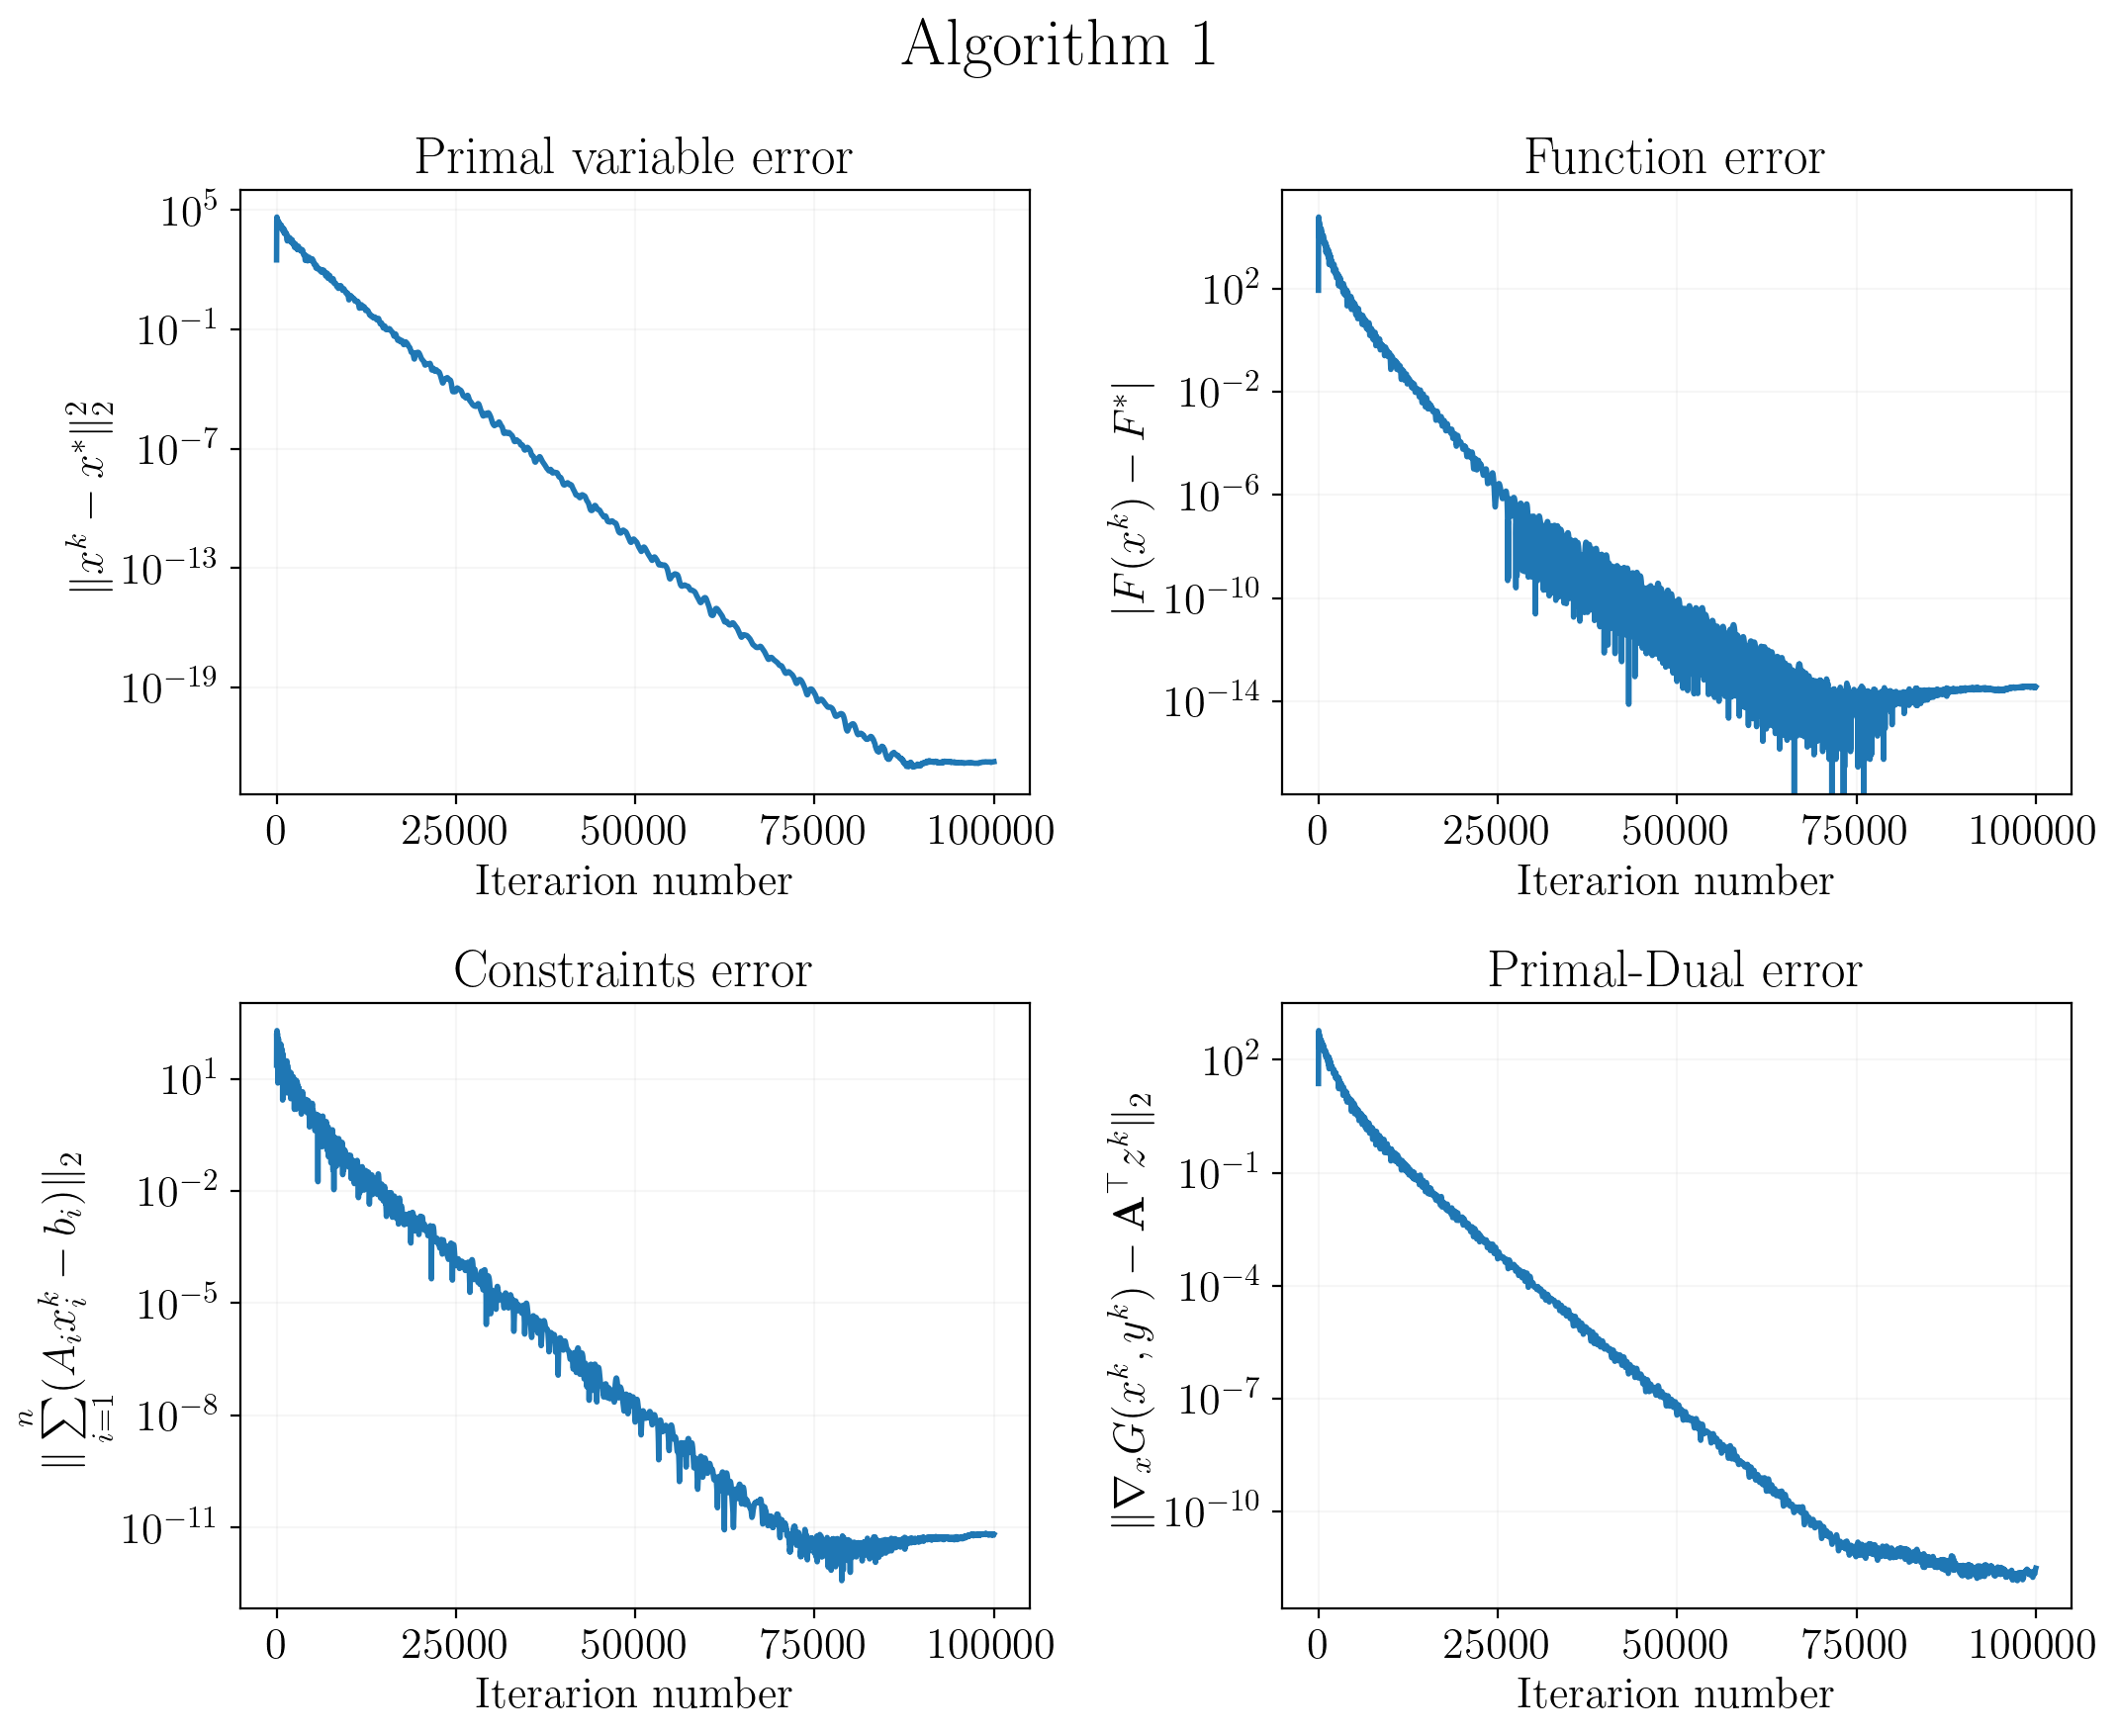

In [4]:
title = 'Algorithm 1'
fig, ax = plt.subplots(2, 2, figsize=(11, 9))

ax[0][0].plot(x_err)
ax[0][0].set_yscale('log')
ax[0][0].set_xlabel("Iterarion number")
ax[0][0].set_ylabel(r"$\| x^k - x^* \|_2^2$")
ax[0][0].set_title("Primal variable error")

ax[0][1].plot(F_err)
ax[0][1].set_yscale('log')
ax[0][1].set_xlabel("Iterarion number")
ax[0][1].set_ylabel(r"$|F(x^k) - F^*|$")
ax[0][1].set_title("Function error")

ax[1][0].plot(cons_err)
ax[1][0].set_yscale('log')
ax[1][0].set_xlabel("Iterarion number")
ax[1][0].set_ylabel(r"$\| \sum\limits_{i=1}^{n} (A_i x_i^k - b_i) \|_2$")
ax[1][0].set_title("Constraints error")

ax[1][1].plot(primal_dual_err)
ax[1][1].set_yscale('log')
ax[1][1].set_xlabel("Iterarion number")
ax[1][1].set_ylabel(r"$\| \nabla_x G(x^k, y^k) - \mathbf{A}^\top z^k \|_2 $")
ax[1][1].set_title("Primal-Dual error")

plt.suptitle(title, fontsize=24)
plt.tight_layout()
plt.show()

### Tracking-ADMM

In [5]:
x, x_err, F_err, cons_err, ts = TrackingADMM(num_steps=NUM_STEPS, model=model, params={'c': 1e-6})

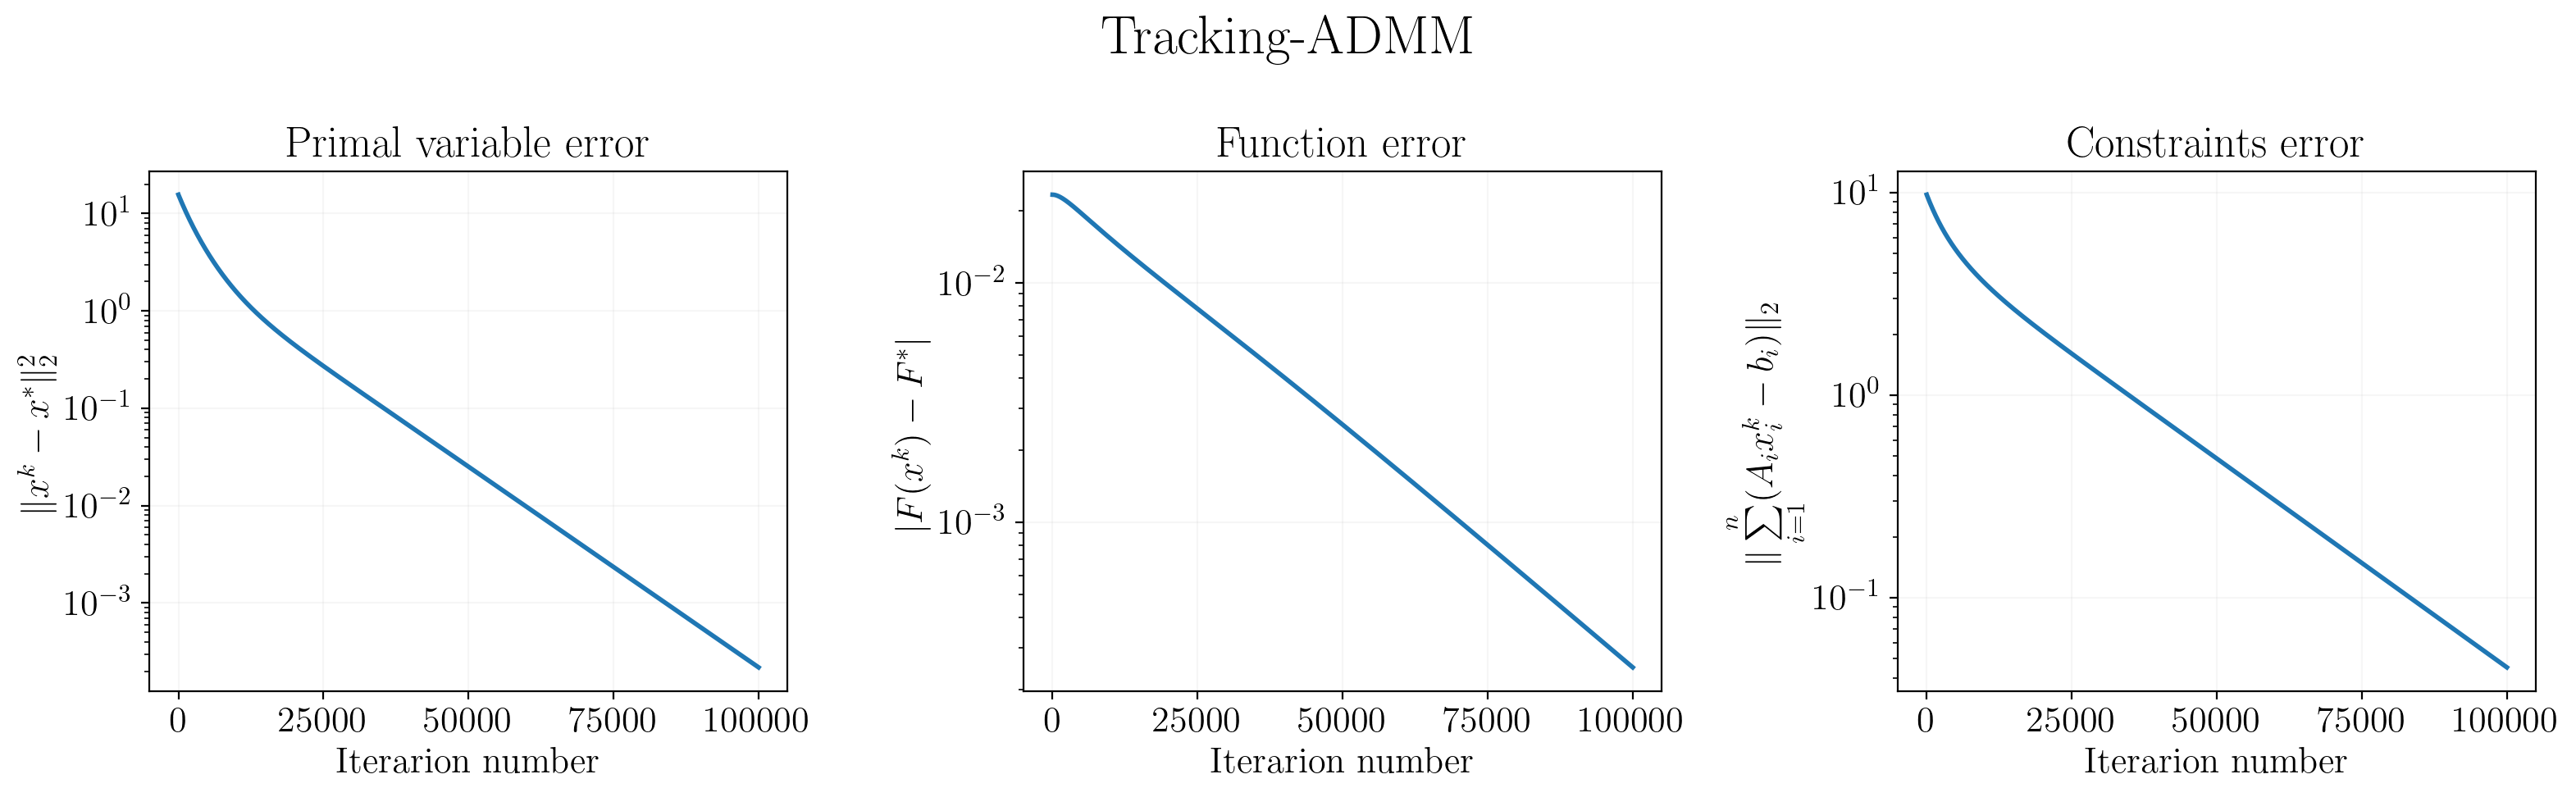

In [6]:
title = "Tracking-ADMM"
fig, ax = plt.subplots(1, 3, figsize=(16, 5))

ax[0].plot(x_err)
ax[0].set_yscale('log')
ax[0].set_xlabel("Iterarion number")
ax[0].set_ylabel(r"$\| x^k - x^* \|_2^2$")
ax[0].set_title("Primal variable error")

ax[1].plot(F_err)
ax[1].set_yscale('log')
ax[1].set_xlabel("Iterarion number")
ax[1].set_ylabel(r"$|F(x^k) - F^*|$")
ax[1].set_title("Function error")

ax[2].plot(cons_err)
ax[2].set_yscale('log')
ax[2].set_xlabel("Iterarion number")
ax[2].set_ylabel(r"$\| \sum\limits_{i=1}^{n} (A_i x_i^k - b_i) \|_2$")
ax[2].set_title("Constraints error")

plt.suptitle(title, fontsize=24)
plt.tight_layout()
plt.show()

### DPMM

In [7]:
x, x_err, F_err, cons_err, ts = DPMM(num_steps=NUM_STEPS, model=model)

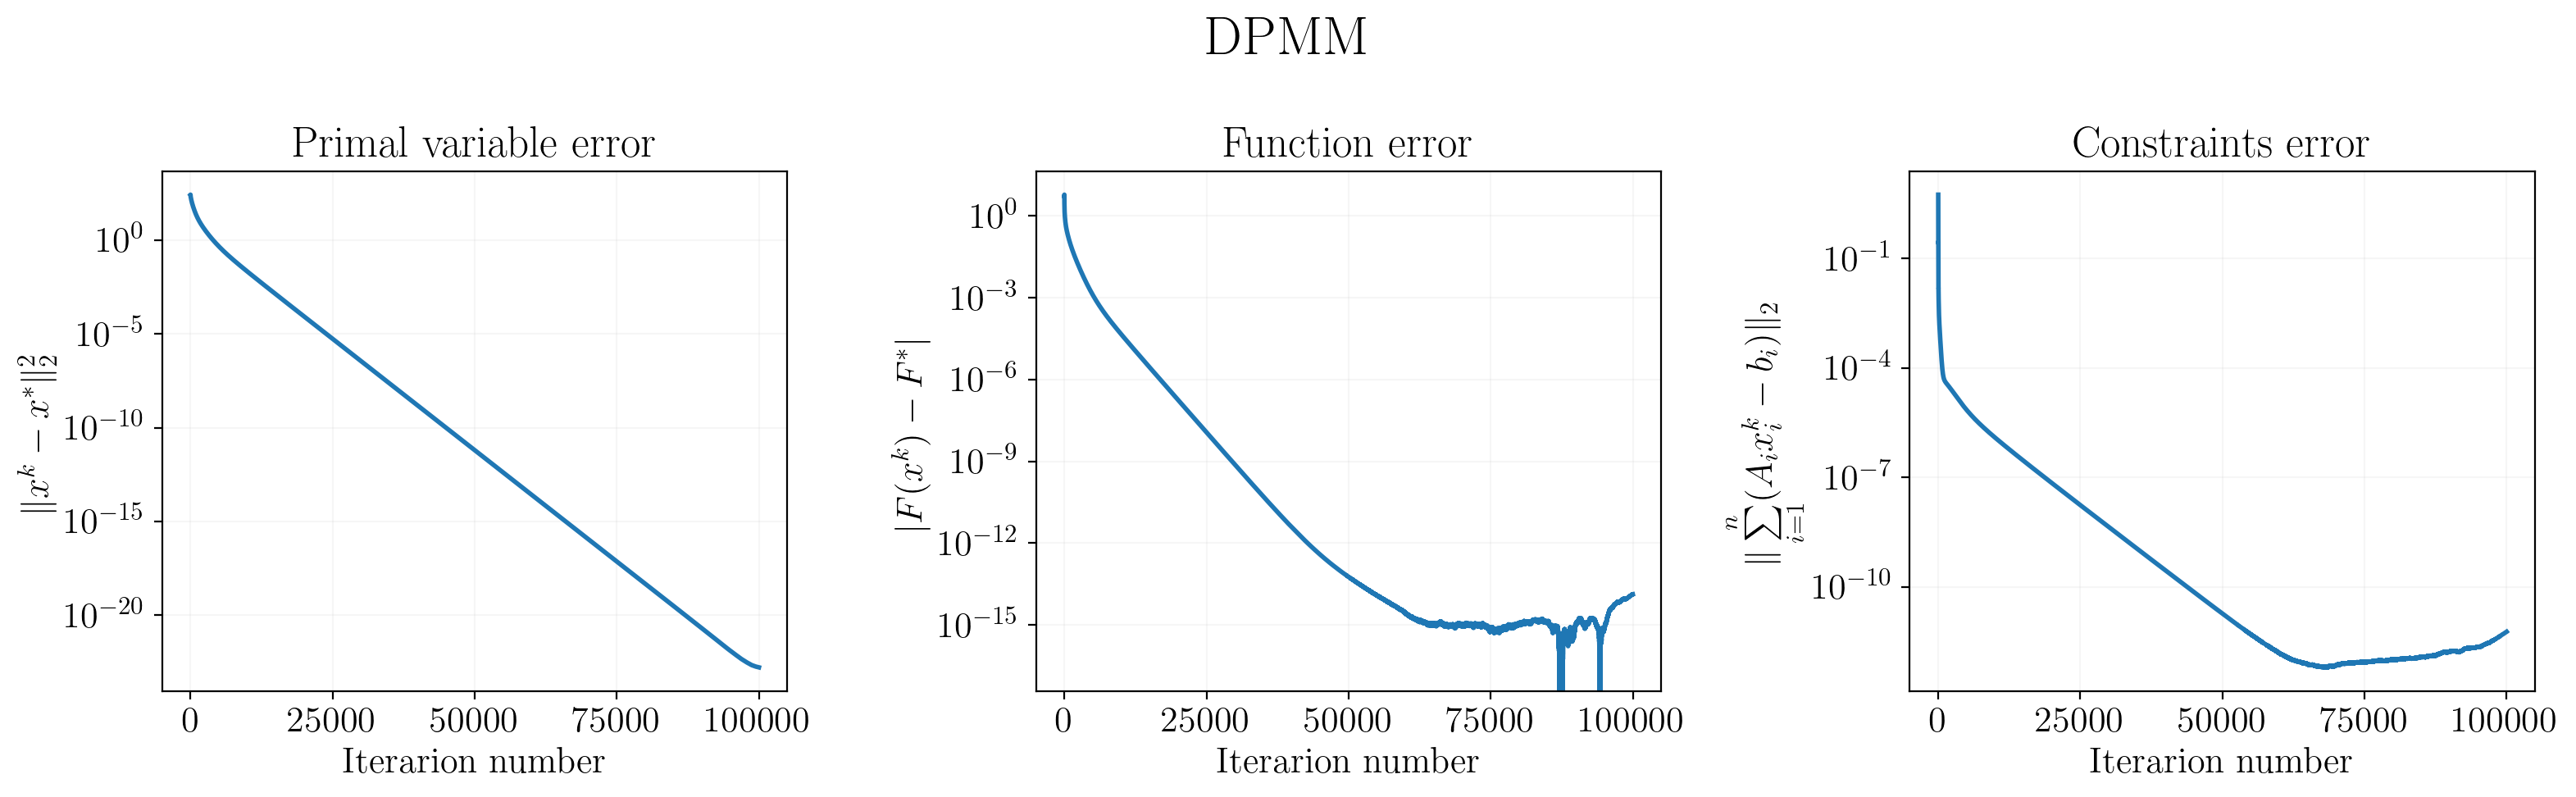

In [8]:
title = "DPMM"
fig, ax = plt.subplots(1, 3, figsize=(16, 5))

ax[0].plot(x_err)
ax[0].set_yscale('log')
ax[0].set_xlabel("Iterarion number")
ax[0].set_ylabel(r"$\| x^k - x^* \|_2^2$")
ax[0].set_title("Primal variable error")

ax[1].plot(F_err)
ax[1].set_yscale('log')
ax[1].set_xlabel("Iterarion number")
ax[1].set_ylabel(r"$|F(x^k) - F^*|$")
ax[1].set_title("Function error")

ax[2].plot(cons_err)
ax[2].set_yscale('log')
ax[2].set_xlabel("Iterarion number")
ax[2].set_ylabel(r"$\| \sum\limits_{i=1}^{n} (A_i x_i^k - b_i) \|_2$")
ax[2].set_title("Constraints error")

plt.suptitle(title, fontsize=24)
plt.tight_layout()
plt.show()

### Comparison

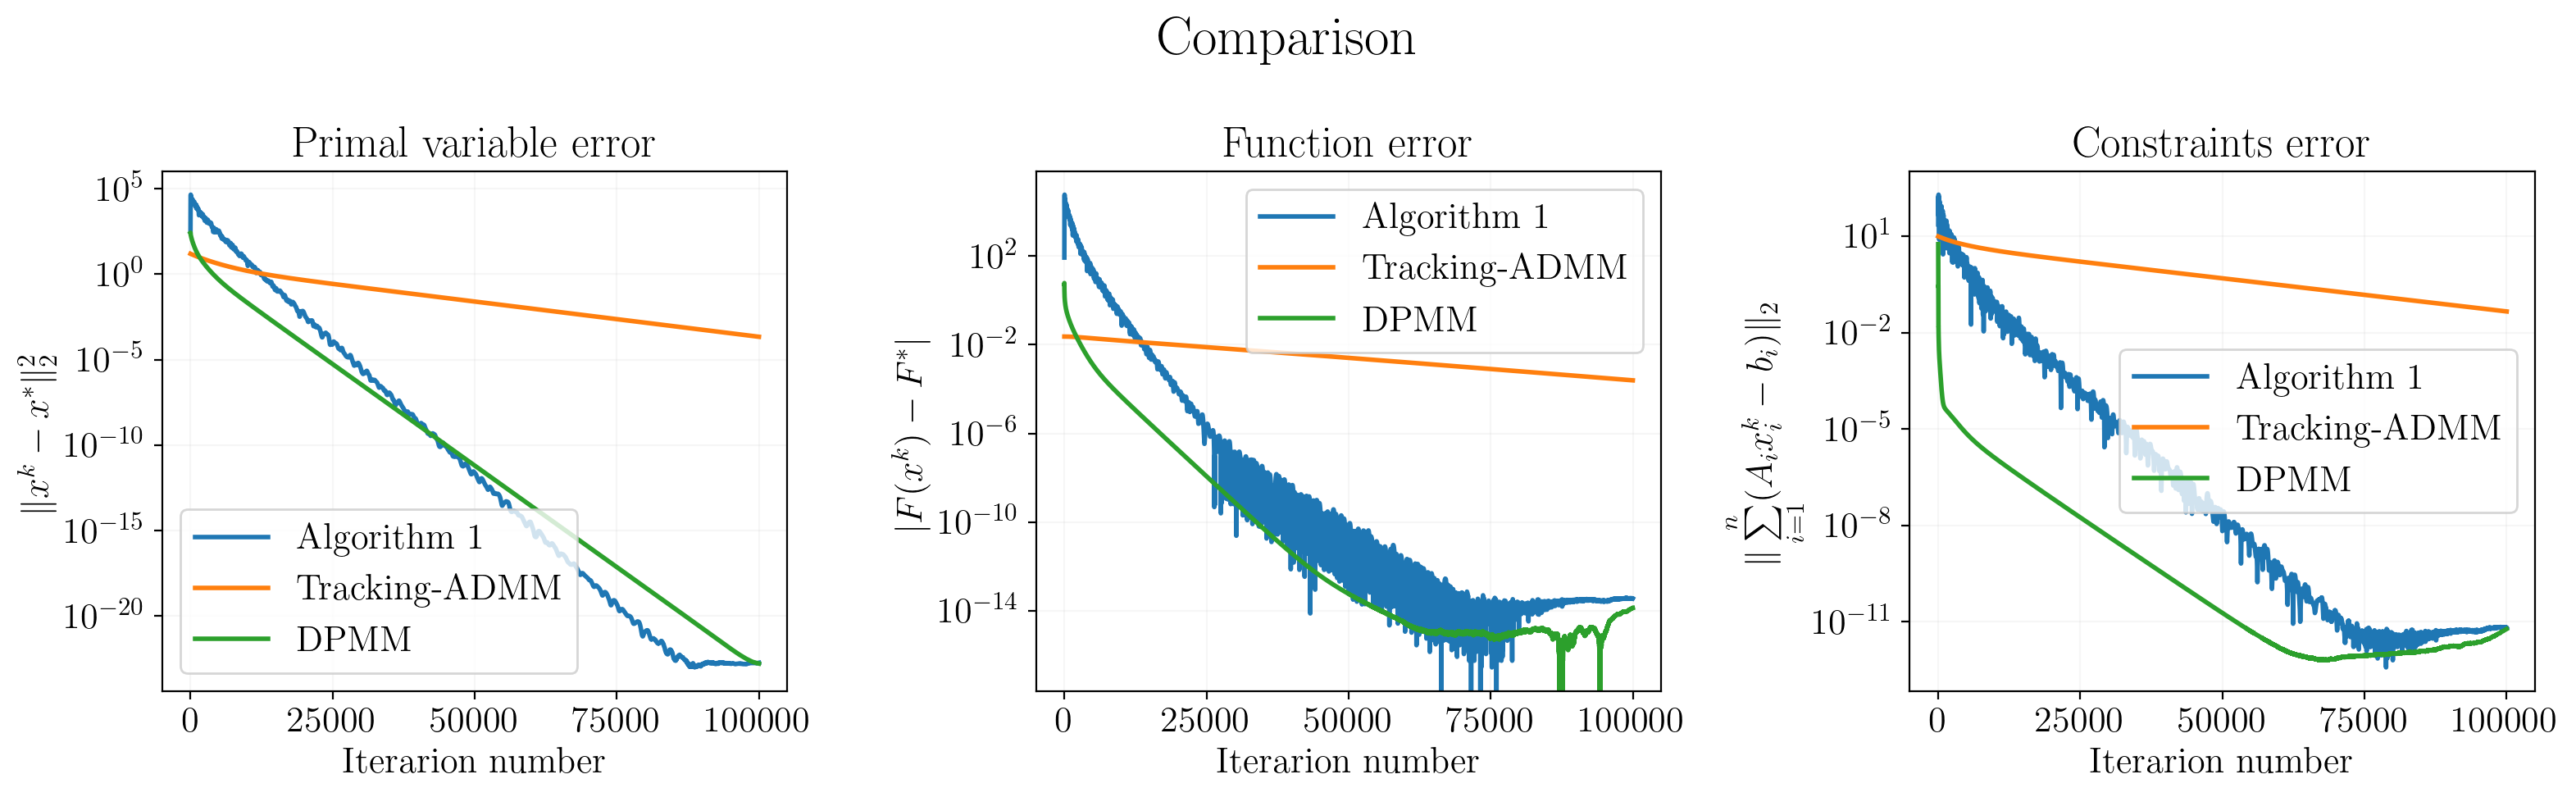

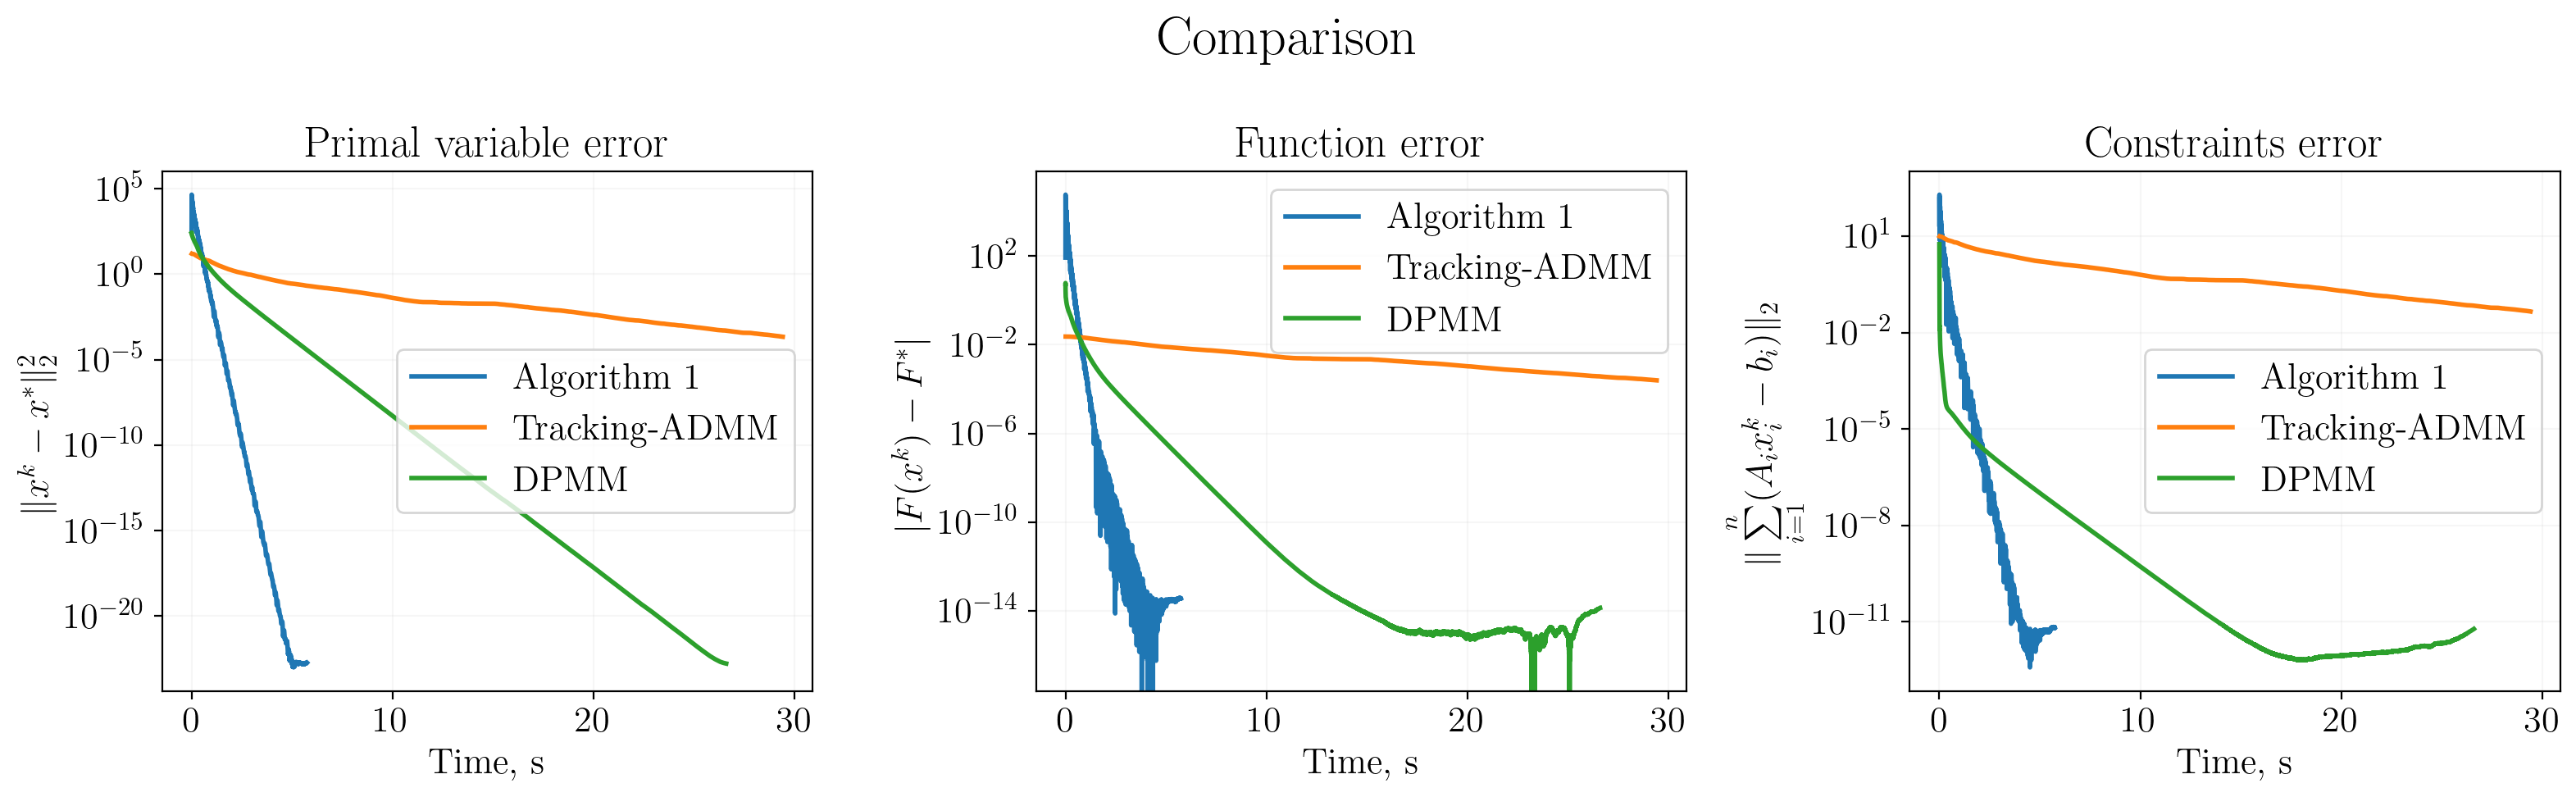

In [16]:
title = "Comparison"
results = {"Algorithm 1": {},
           "Tracking-ADMM": {},
           "DPMM": {}}

name = "Algorithm 1"
_, x_err, F_err, cons_err, _, ts = algorithm_1(num_steps=NUM_STEPS, model=model)
results[name]['x_err'] = x_err
results[name]['F_err'] = F_err
results[name]['cons_err'] = cons_err
results[name]['ts'] = ts

name = "Tracking-ADMM"
_, x_err, F_err, cons_err, ts = TrackingADMM(num_steps=NUM_STEPS, model=model, params={'c': 1e-6})
results[name]['x_err'] = x_err
results[name]['F_err'] = F_err
results[name]['cons_err'] = cons_err
results[name]['ts'] = ts

name = "DPMM"
_, x_err, F_err, cons_err, ts = DPMM(num_steps=NUM_STEPS, model=model)
results[name]['x_err'] = x_err
results[name]['F_err'] = F_err
results[name]['cons_err'] = cons_err
results[name]['ts'] = ts

fig, ax = plt.subplots(1, 3, figsize=(16, 5))

ax[0].plot(results["Algorithm 1"]['x_err'], label="Algorithm 1")
ax[0].plot(results["Tracking-ADMM"]['x_err'], label="Tracking-ADMM")
ax[0].plot(results["DPMM"]['x_err'], label="DPMM")
ax[0].set_yscale('log')
ax[0].set_xlabel("Iterarion number")
ax[0].set_ylabel(r"$\| x^k - x^* \|_2^2$")
ax[0].set_title("Primal variable error")
ax[0].legend()

ax[1].plot(results["Algorithm 1"]['F_err'], label="Algorithm 1")
ax[1].plot(results["Tracking-ADMM"]['F_err'], label="Tracking-ADMM")
ax[1].plot(results["DPMM"]['F_err'], label="DPMM")
ax[1].set_yscale('log')
ax[1].set_xlabel("Iterarion number")
ax[1].set_ylabel(r"$|F(x^k) - F^*|$")
ax[1].set_title("Function error")
ax[1].legend()

ax[2].plot(results["Algorithm 1"]['cons_err'], label="Algorithm 1")
ax[2].plot(results["Tracking-ADMM"]['cons_err'], label="Tracking-ADMM")
ax[2].plot(results["DPMM"]['cons_err'], label="DPMM")
ax[2].set_yscale('log')
ax[2].set_xlabel("Iterarion number")
ax[2].set_ylabel(r"$\| \sum\limits_{i=1}^{n} (A_i x_i^k - b_i) \|_2$")
ax[2].set_title("Constraints error")
ax[2].legend()

plt.suptitle(title, fontsize=24)
plt.tight_layout()
plt.show()


fig, ax = plt.subplots(1, 3, figsize=(16, 5))

ax[0].plot(results["Algorithm 1"]['ts'], results["Algorithm 1"]['x_err'], label="Algorithm 1")
ax[0].plot(results["Tracking-ADMM"]['ts'], results["Tracking-ADMM"]['x_err'], label="Tracking-ADMM")
ax[0].plot(results["DPMM"]['ts'], results["DPMM"]['x_err'], label="DPMM")
ax[0].set_yscale('log')
ax[0].set_xlabel("Time, s")
ax[0].set_ylabel(r"$\| x^k - x^* \|_2^2$")
ax[0].set_title("Primal variable error")
ax[0].legend()

ax[1].plot(results["Algorithm 1"]['ts'], results["Algorithm 1"]['F_err'], label="Algorithm 1")
ax[1].plot(results["Tracking-ADMM"]['ts'], results["Tracking-ADMM"]['F_err'], label="Tracking-ADMM")
ax[1].plot(results["DPMM"]['ts'], results["DPMM"]['F_err'], label="DPMM")
ax[1].set_yscale('log')
ax[1].set_xlabel("Time, s")
ax[1].set_ylabel(r"$|F(x^k) - F^*|$")
ax[1].set_title("Function error")
ax[1].legend()

ax[2].plot(results["Algorithm 1"]['ts'], results["Algorithm 1"]['cons_err'], label="Algorithm 1")
ax[2].plot(results["Tracking-ADMM"]['ts'], results["Tracking-ADMM"]['cons_err'], label="Tracking-ADMM")
ax[2].plot(results["DPMM"]['ts'], results["DPMM"]['cons_err'], label="DPMM")
ax[2].set_yscale('log')
ax[2].set_xlabel("Time, s")
ax[2].set_ylabel(r"$\| \sum\limits_{i=1}^{n} (A_i x_i^k - b_i) \|_2$")
ax[2].set_title("Constraints error")
ax[2].legend()

plt.suptitle(title, fontsize=24)
plt.tight_layout()
plt.show()